# 🛠️ Feature Engineering: Employee Productivity Prediction
This notebook walks through a practical example of feature engineering using a small employee dataset. We'll demonstrate feature creation, transformation, selection, and extraction with clear steps and visual outputs.

## 📥 Step 1: Load the Raw Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initial raw dataset
data = pd.DataFrame({
    'Employee_ID': [1, 2, 3, 4],
    'Age': [25, 40, 35, 28],
    'Years_of_Experience': [3, 2, 10, 5],
    'Education_Level': ['Bachelor', 'Master', 'PhD', 'Bachelor'],
    'Salary': [50, 120, 100, 60],
    'Work_Hours_per_Week': [40, 50, 45, 38],
    'Remote_Work': ['Yes', 'No', 'No', 'Yes'],
    'Department': ['IT', 'Finance', 'IT', 'HR']
})

# Add a synthetic productivity score
data['Productivity_Score'] = (0.3 * data['Work_Hours_per_Week'] +
                              0.4 * (data['Years_of_Experience'] / data['Age']) +
                              0.2 * np.log(data['Salary']) +
                              0.1 * (data['Remote_Work'] == 'Yes').astype(int)).round(2)
data

,Employee_ID,Age,Years_of_Experience,Education_Level,Salary,Work_Hours_per_Week,Remote_Work,Department,Productivity_Score
0,1,25,3,Bachelor,50,40,Yes,IT,12.93
1,2,40,2,Master,120,50,No,Finance,15.98
2,3,35,10,PhD,100,45,No,IT,14.54
3,4,28,5,Bachelor,60,38,Yes,HR,12.39


## ✳️ Step 2: Feature Creation – Add Experience-to-Age Ratio

In [7]:
data['Exp_Age_Ratio'] = data['Years_of_Experience'] / data['Age']
data[['Employee_ID', 'Years_of_Experience', 'Age', 'Exp_Age_Ratio']]

,Employee_ID,Years_of_Experience,Age,Exp_Age_Ratio
0,1,3,25,0.120000
1,2,2,40,0.050000
2,3,10,35,0.285714
3,4,5,28,0.178571


## 🔁 Step 3: Feature Transformation – Log Transformation of Salary

In [8]:
data['Log_Salary'] = np.log(data['Salary'])
data[['Employee_ID', 'Salary', 'Log_Salary']]

,Employee_ID,Salary,Log_Salary
0,1,50,3.912023
1,2,120,4.787492
2,3,100,4.605170
3,4,60,4.094345


## 🧹 Step 4: Feature Selection – Remove Redundant Columns

In [9]:
data.drop(columns=['Years_of_Experience'], inplace=True)
data.head()

,Employee_ID,Age,Education_Level,Salary,Work_Hours_per_Week,Remote_Work,Department,Productivity_Score,Exp_Age_Ratio,Log_Salary
0,1,25,Bachelor,50,40,Yes,IT,12.93,0.120000,3.912023
1,2,40,Master,120,50,No,Finance,15.98,0.050000,4.787492
2,3,35,PhD,100,45,No,IT,14.54,0.285714,4.605170
3,4,28,Bachelor,60,38,Yes,HR,12.39,0.178571,4.094345


## 🔤 Step 5: Feature Extraction – Encode Categorical Variables

In [10]:
# Ordinal encode education
education_map = {'Bachelor': 1, 'Master': 2, 'PhD': 3}
data['Edu_Level'] = data['Education_Level'].map(education_map)

# Binary encode Remote_Work
data['Remote'] = data['Remote_Work'].map({'No': 0, 'Yes': 1})

# One-hot encode Department
dept_dummies = pd.get_dummies(data['Department'], prefix='Dept')
data = pd.concat([data, dept_dummies], axis=1)

# Drop old columns
data.drop(columns=['Education_Level', 'Remote_Work', 'Department'], inplace=True)
data.head()

,Employee_ID,Age,Salary,Work_Hours_per_Week,Productivity_Score,Exp_Age_Ratio,Log_Salary,Edu_Level,Remote,Dept_Finance,Dept_HR,Dept_IT
0,1,25,50,40,12.93,0.120000,3.912023,1,1,False,False,True
1,2,40,120,50,15.98,0.050000,4.787492,2,0,True,False,False
2,3,35,100,45,14.54,0.285714,4.605170,3,0,False,False,True
3,4,28,60,38,12.39,0.178571,4.094345,1,1,False,True,False


## 📊 Step 6: Visualize Relationships

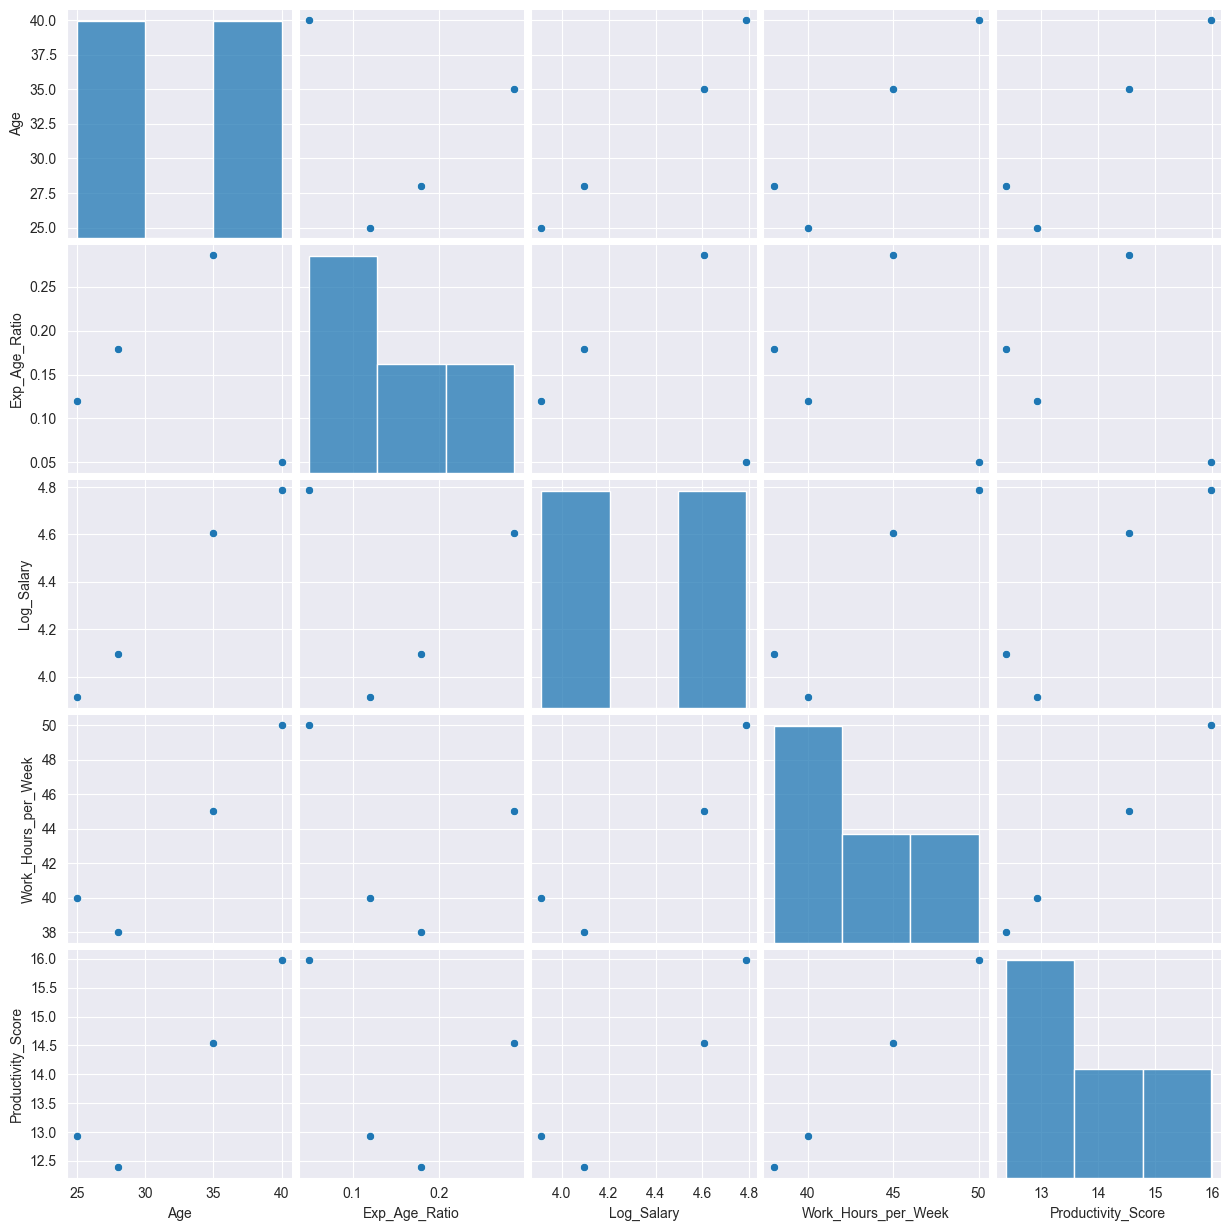

In [11]:
sns.pairplot(data[['Age', 'Exp_Age_Ratio', 'Log_Salary', 'Work_Hours_per_Week', 'Productivity_Score']]);

## ✅ Final Engineered Dataset

In [12]:
data.round(2)

,Employee_ID,Age,Salary,Work_Hours_per_Week,Productivity_Score,Exp_Age_Ratio,Log_Salary,Edu_Level,Remote,Dept_Finance,Dept_HR,Dept_IT
0,1,25,50,40,12.93,0.12,3.91,1,1,False,False,True
1,2,40,120,50,15.98,0.05,4.79,2,0,True,False,False
2,3,35,100,45,14.54,0.29,4.61,3,0,False,False,True
3,4,28,60,38,12.39,0.18,4.09,1,1,False,True,False
